In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv('data_2_var.csv')

In [115]:
df.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [116]:
df.shape

(1110, 2)

In [117]:
df.columns = ['input','output']

In [118]:
df.head(50)

,input,output
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
5,-115.563739,-126.267621
6,-132.080161,-132.032206
7,-133.366669,-114.000000
8,-119.524112,-94.419855
9,-125.743622,-107.499324


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1110 non-null   float64
 1   output  1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [120]:
df.describe()

,input,output
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


In [121]:
df.isnull()

,input,output
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1105,False,False
1106,False,False
1107,False,False
1108,False,False


In [122]:
sum(df['input']==0)

0

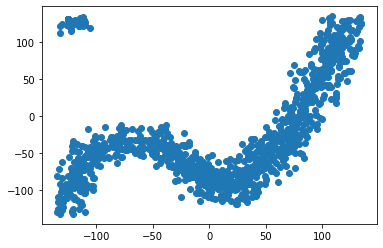

In [123]:
plt.scatter(df['input'], df['output'])
plt.show()

In [124]:
max_thresold = df['input'].quantile(0.95)
max_thresold

116.625030915

In [125]:
len(df[df['input']>max_thresold])

56

In [126]:
min_thresold = df['input'].quantile(0.05)
min_thresold

-123.02764678999999

In [127]:
len(df[df['input']<min_thresold])

56

In [128]:
df1 = df[(df['input']<max_thresold) & (df['input']>min_thresold)]

In [129]:
df1.shape

(998, 2)

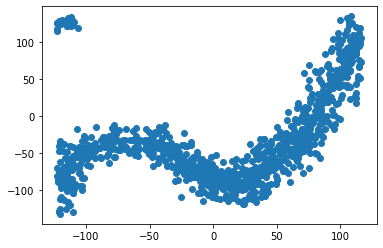

In [130]:
plt.scatter(df1['input'], df1['output'])
plt.show()

In [131]:
df1.head()

,input,output
0,-121.531419,-129.938929
2,-120.605951,-125.760932
5,-115.563739,-126.267621
8,-119.524112,-94.419855
11,-114.100895,-117.674002


In [132]:
x=df1[['input']]
y=df1['output']

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)

# linear regression

In [136]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [138]:
y_test_pred = regressor.predict(x_test)

In [139]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
790,-46.000000,-73.744762
619,-79.131137,-33.707066
1010,-4.142244,1.652144
459,103.000000,6.221654
163,-39.286217,-50.671181
...,...,...
963,-80.000000,-21.048000
544,-29.114914,-12.741355
220,-87.662193,-28.140544
460,102.050422,4.511295


In [141]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  42.87842430653749
Mean Squared Error:  3083.365793393659
Root Mean Squared Error:  55.52806311581252


In [142]:
print(metrics.r2_score(y_test, y_test_pred))

0.16709249482952482


<AxesSubplot:>

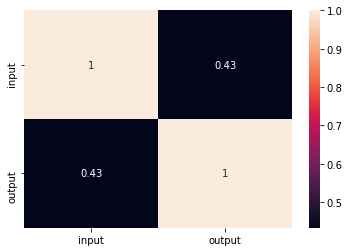

In [143]:
plt.figure()
sns.heatmap(df1.corr(), annot = True)

# Decision Tree

In [158]:
from sklearn.tree import DecisionTreeRegressor
regressor =DecisionTreeRegressor (max_depth = 2)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [159]:
y_test_pred = regressor.predict(x_test)


In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

In [160]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  26.153231062041424
Mean Squared Error:  1493.1205770847314
Root Mean Squared Error:  38.64091842962239


In [161]:
print(metrics.r2_score(y_test, y_test_pred))

0.5966643537906151


# random Forest

In [164]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [165]:
y_test_pred_rfr = rfr.predict(x_test)

In [166]:
rfr_df1 = pd.DataFrame({'Actual':y_test,'predict':y_test_pred_rfr})

rfr_df1.head()

,Actual,predict
790,-46.000000,-77.223777
619,-79.131137,-86.635826
1010,-4.142244,70.902007
459,103.000000,93.921843
163,-39.286217,-39.853493


In [167]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred_rfr))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred_rfr))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_rfr)))

Mean Absolute Error:  24.827592895023802
Mean Squared Error:  1690.062977453058
Root Mean Squared Error:  41.11037554502583


In [168]:
print(metrics.r2_score(y_test, y_test_pred_rfr))

0.5434644370942165


In [ ]:
# So here decision tree is working better for this model 
# and random forest is not working better